In [231]:
import pandas as pd
import numpy as np
import scipy.io
import scipy.stats as st
import matplotlib.pyplot as plt
import math

# Problem #1

1) Calculate the rate of Sea Level Rise between 1940-1985 and 1985-2023. At the 95% confidence interval—what is the range of sea level rise for each of these periods.  Do they differ at the 95% confidence level?  Plot  and describe both the sea level variability, the fit, and the residual (error)

In [239]:
data = scipy.io.loadmat('battery_annual_mean.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Feb  8 11:57:50 2023',
 '__version__': '1.0',
 '__globals__': [],
 'H': array([[0.57821423, 0.53864822, 0.55264372, 0.54295708, 0.58707043,
         0.58346983, 0.6133355 , 0.56883687, 0.61091769, 0.58830692,
         0.62313881, 0.64008938, 0.63966484, 0.63980954, 0.61927763,
         0.65344087, 0.63068196, 0.64789982, 0.68017432, 0.66411119,
         0.65240422, 0.69148668, 0.65811495, 0.6292605 , 0.68413276,
         0.68831045, 0.68850263, 0.66168208, 0.68701632, 0.70890437,
         0.65867009, 0.71258778, 0.66359669, 0.72088399, 0.69153527,
         0.73057957, 0.66047511, 0.69777004, 0.70114543, 0.69281553,
         0.73948002, 0.69233242, 0.73966187, 0.73407922, 0.735396  ,
         0.76473076, 0.75311066, 0.73476044, 0.72954581, 0.69627898,
         0.78424527, 0.77141826, 0.72305902, 0.69622678, 0.70856762,
         0.71760342, 0.80650171, 0.78309643, 0.73483505, 0.75474566,
         0.78074384, 0.724666

In [240]:
height = data['H'][0]
yr = data['YR'][0]

In [25]:
yr[58:]

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022], dtype=uint16)

In [241]:
n = list(range(13, 59))
height[n]

array([0.63980954, 0.61927763, 0.65344087, 0.63068196, 0.64789982,
       0.68017432, 0.66411119, 0.65240422, 0.69148668, 0.65811495,
       0.6292605 , 0.68413276, 0.68831045, 0.68850263, 0.66168208,
       0.68701632, 0.70890437, 0.65867009, 0.71258778, 0.66359669,
       0.72088399, 0.69153527, 0.73057957, 0.66047511, 0.69777004,
       0.70114543, 0.69281553, 0.73948002, 0.69233242, 0.73966187,
       0.73407922, 0.735396  , 0.76473076, 0.75311066, 0.73476044,
       0.72954581, 0.69627898, 0.78424527, 0.77141826, 0.72305902,
       0.69622678, 0.70856762, 0.71760342, 0.80650171, 0.78309643,
       0.73483505])

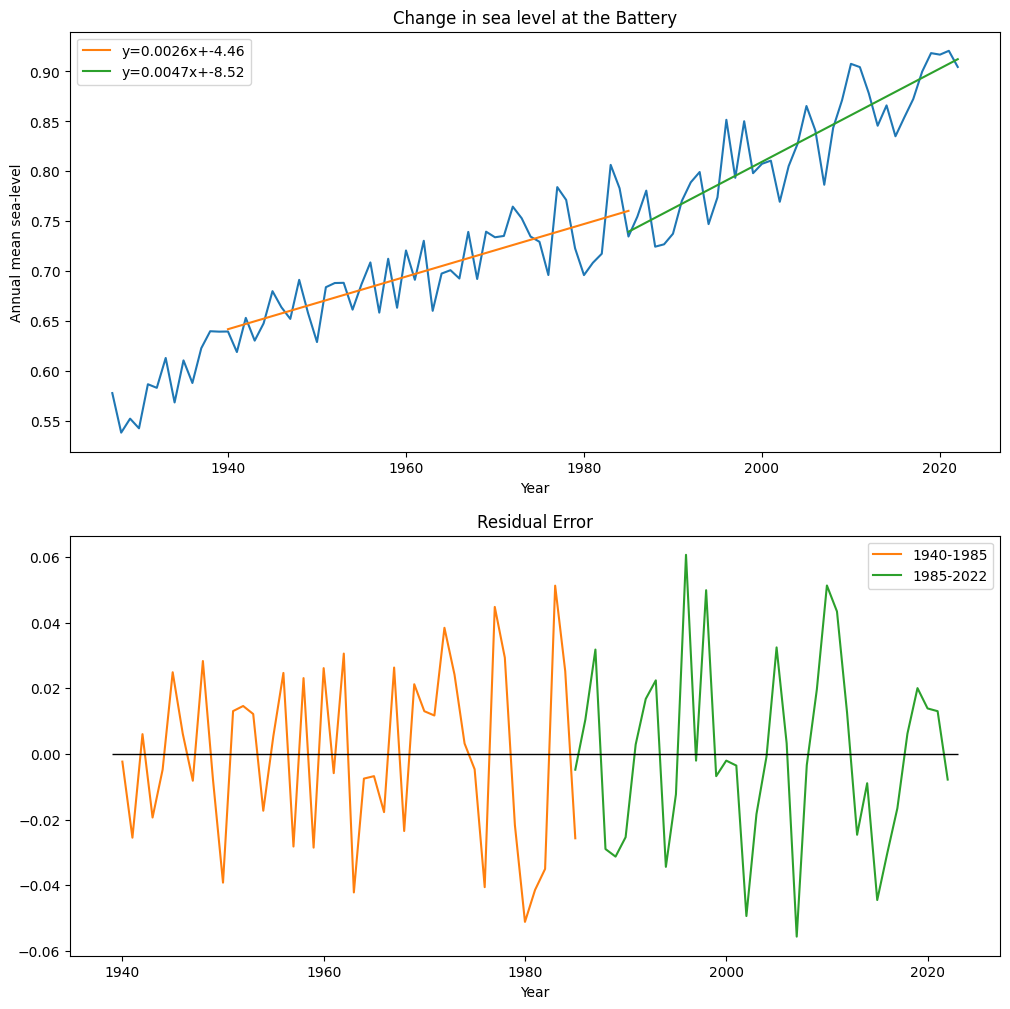

In [242]:
# plot data
fig, ax = plt.subplots(2,1,figsize=(12, 12))
ax[0].plot(yr, height)
ax[0].set(title='Change in sea level at the Battery', ylabel='Annual mean sea-level', xlabel='Year')

# find line of best fit for 1940-1985
a, b = np.polyfit(yr[13:59], height[13:59], 1)

# find line of best fit for 1985-2022
c, d = np.polyfit(yr[58:], height[58:], 1)

earlyfit=a*yr[13:59]+b
recentfit=c*yr[58:]+d

#add line of best fit to plot
ax[0].plot(yr[13:59], earlyfit, label=f'y={a:.4f}x+{b:.2f}')
ax[0].plot(yr[58:], recentfit, label=f'y={c:.4f}x+{d:.2f}')
ax[0].legend()

# plot the residual error
ax[1].plot(yr[13:59], height[13:59]-earlyfit, color='tab:orange', label='1940-1985')
ax[1].plot(yr[58:], height[58:]-recentfit, color='tab:green', label='1985-2022')
ax[1].set(title='Residual Error', xlabel='Year')
ax[1].hlines(y=0, xmin=1939, xmax=2023, linewidth=1, color='k')
ax[1].legend()


In [244]:
# calculate the confidence intervals, taken from slr.m

i1 = list(range(13, 59)) # first half
i2 = list(range(58, len(yr))) # second half

Yp=height[i1]- np.mean(height[i1])
Xp=yr[i1]-np.mean(yr[i1])
m1=np.mean(Xp*Yp)/np.var(Xp)
b1=np.mean(height[i1]) - m1*np.mean(yr[i1])
Hp=b1+m1*yr[i1]
r1=np.mean(Xp*Yp)**2/(np.var(Xp)*np.var(Yp))
N=len(Xp)
Sem1=(N/(N-2))*(1-r1)*np.var(Yp)
Sem1=math.sqrt(Sem1)/(math.sqrt(N)*np.std(Xp))
err1 = st.t.ppf(0.975, N-2) * Sem1
# err1=tinv(.975,N-2)*Sem1


Yp2=height[i2]- np.mean(height[i2])
Xp2=yr[i2]-np.mean(yr[i2])
m2=np.mean(Xp2*Yp2)/np.var(Xp2)
b2=np.mean(height[i2]) - m2*np.mean(yr[i2])
Hp2=b2+m2*yr[i2]
r2=np.mean(Xp2*Yp2)**2/(np.var(Xp2)*np.var(Yp2))
N2=len(Xp2)
Sem2=(N2/(N2-2))*(1-r2)*np.var(Yp2)
Sem2=math.sqrt(Sem2)/(math.sqrt(N2)*np.std(Xp2))
err2 = st.t.ppf(0.975, N2-2) * Sem2

print(err1, err2)

ci1 = [a-err1, a+err1]
ci2 = [c-err2, c+err2]

print(ci1, ci2)

0.0005865303578174219 0.0008466397911007026
[0.0020439886222335204, 0.0032170493378683644] [0.0038187387812664377, 0.005512018363467843]


# Problem #2

2) The file Battery_2022 contains hourly sea-level data from the Battery for the year 2022. Using Harmonic analysis fit as many tidal harmonics to the time series that you can (based on the criteria discussed in class) and use those harmonics to predict the tides in January 2023  (Battery_2023.mat). List the amplitude and phase of all the constituents that you fit. Plot the data and fit for  January 2023 along with the residual and describe the result.

In [41]:
dta = scipy.io.loadmat('Battery_2022.mat')
dta

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Feb  8 11:50:00 2023',
 '__version__': '1.0',
 '__globals__': [],
 'H': array([[1.622, 1.304, 0.926, ..., 1.371, 1.175, 0.903]]),
 'tm': array([[738522.        , 738522.04166667, 738522.08333333, ...,
         738886.875     , 738886.91666667, 738886.95833333]])}

In [123]:
time = dta['tm']
sl = dta['H']

[Text(0.5, 1.0, 'Jan 2022 Sea Level at the Battery (NY)'),
 Text(0, 0.5, 'Sea level height'),
 Text(0.5, 0, 'Time')]

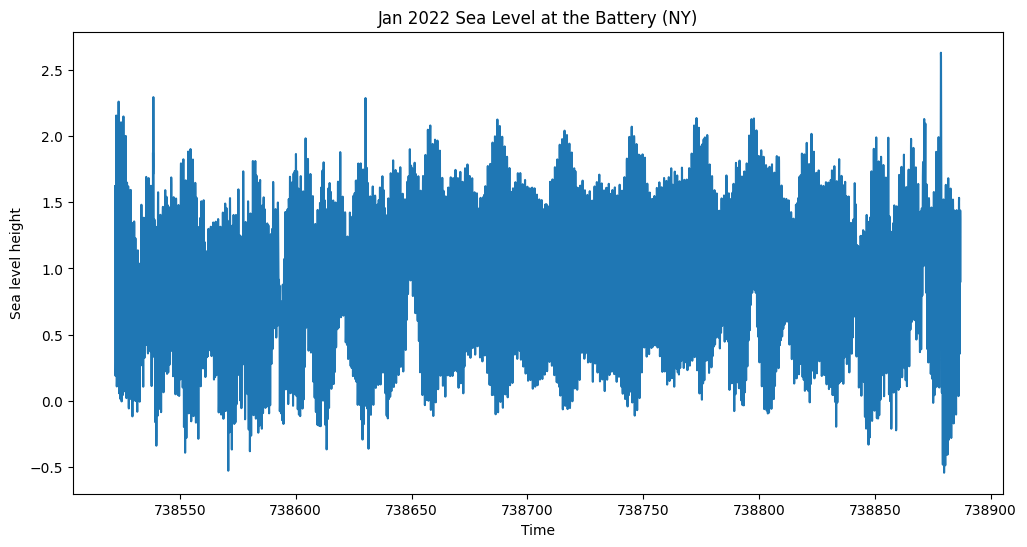

In [48]:
# plot data
fig, ax = plt.subplots(1,1,figsize=(12, 6))
ax.plot(time, sl)
ax.set(title='2022 Hourly Sea Level at the Battery (NY)', ylabel='Sea level height', xlabel='Time')

[Text(0.5, 1.0, '2022 Hourly Sea Level at the Battery (NY)'),
 Text(0, 0.5, 'Sea level height'),
 Text(0.5, 0, 'Time')]

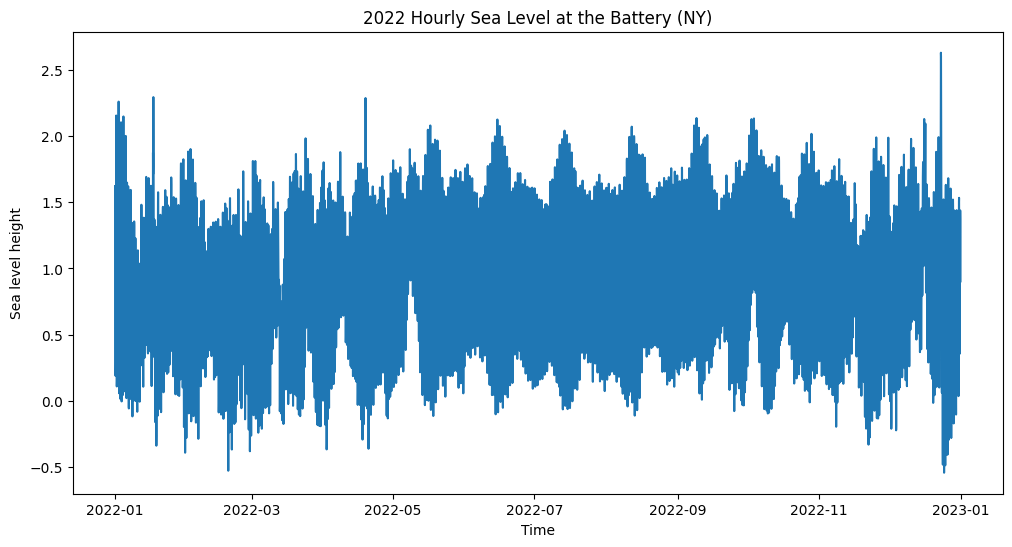

In [66]:
# convert time to standard format
timestamps = pd.to_datetime(time-719529, unit='D')

# plot data
fig, ax = plt.subplots(1,1,figsize=(12, 6))
ax.plot(timestamps, sl)
ax.set(title='2022 Hourly Sea Level at the Battery (NY)', ylabel='Sea level height', xlabel='Time')

[Text(0.5, 1.0, 'Hourly Sea Level at the Battery (NY)'),
 Text(0, 0.5, 'Sea level height'),
 Text(0.5, 0, 'Time')]

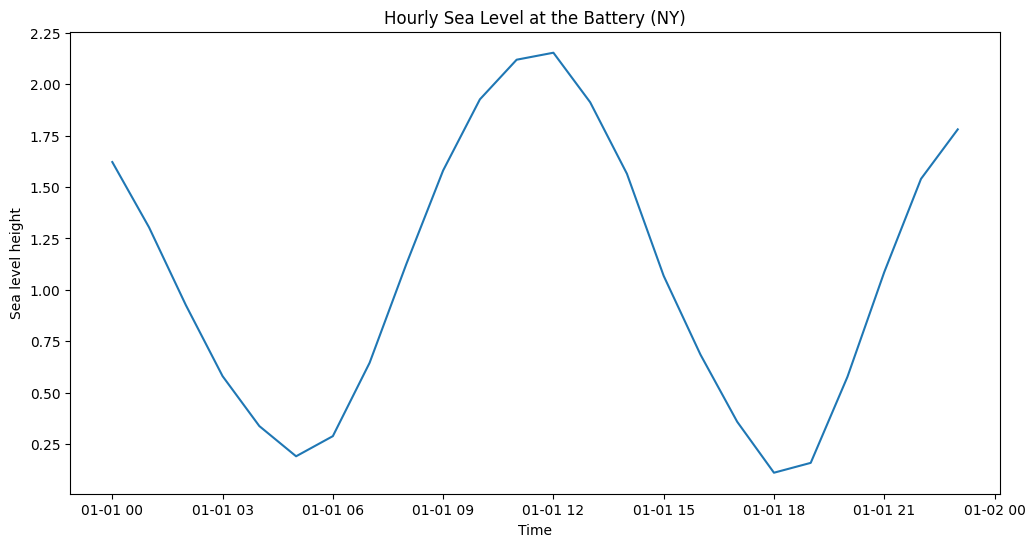

In [67]:
# plot daily data
fig, ax = plt.subplots(1,1,figsize=(12, 6))
ax.plot(timestamps[:24], sl[:24])
ax.set(title='Hourly Sea Level at the Battery (NY)', ylabel='Sea level height', xlabel='Time')

In [193]:
# find the highest frequency

delta_t = time[0][1] - time[0][0]
T = len(time[0])

print(delta_t, T)

# the highest frequency, Nyquist Frequency = 2 deltaT
max_f = 2*delta_t

print(range(1,10))

0.04166666662786156 8760
range(1, 10)


C:\Users\Goblin\AppData\Local\Temp\ipykernel_20412\1811474150.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(DD, Y)


[Text(0.5, 1.0, 'Model Error')]

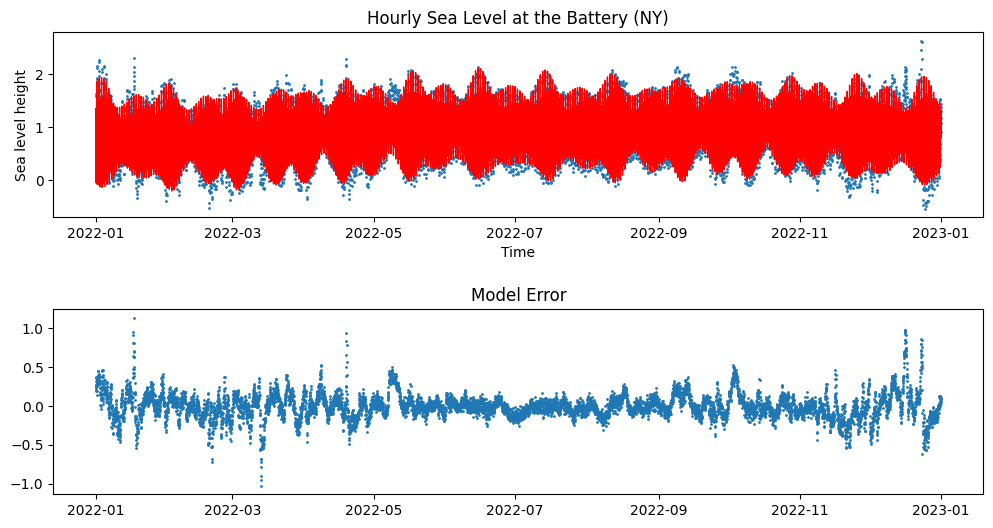

In [190]:
# calculate harmonics

h = pd.read_excel('Doodson_numbers.xlsx')
# a.iloc[:, 6]
per = h.iloc[:,6].values/24 
om = (2*np.pi)/per

def lsq(tm, om, H):
    X = np.exp(1j * om.reshape(-1,1) @ tm)
    D = np.block([np.ones((len(tm[0]),1)), X.real.conj().T, X.imag.conj().T])
    DD = D.conj().T @ D  # creates identity matrix from vector 
    Y = np.sum([D * H.T], axis=1).T # del from notes
    B = np.linalg.lstsq(DD, Y)
    B = B[0]
    Ym = np.sum([D.T * B], axis=1)    # model
    Yerr = H-Ym           # error
    return B, Ym, Yerr

B, Ym, Yerr = lsq(time, om, sl)

# plot harmonics
fig, ax = plt.subplots(2,1,figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)
ax[0].scatter(timestamps, sl, s=1)
ax[0].plot(timestamps, Ym.T, color='r', linewidth=1)
ax[0].set(title='Hourly Sea Level at the Battery (NY)', ylabel='Sea level height', xlabel='Time')

ax[1].scatter(timestamps, Yerr.T, s=1)
ax[1].set(title='Model Error')

In [226]:
# list the amplitude and phase of all harmonic constituents

# ignore the first entry, this is the mean. Select even and odd index entries which correspond to the cos ans sin coefficients
A_coef = B.T[0][2::2]
B_coef = B.T[0][1::2]
amp = []
phase = []
for i in range(len(A_coef)):
    amp.append(math.sqrt(A_coef[i]**2 + B_coef[i]**2))
    phase.append(math.atan(B_coef[i]/A_coef[i]))

# for i in range(len(amp)):
#     print(amp[i])

for i in range(len(phase)):
    print(phase[i])

-1.4206224363630051
-0.7657970532222466
0.7791879375284898
-0.2792718580283604
1.1471182576451509
-0.36631721641655396
-1.1251839262897354
-0.21786991106306697
1.3835034793318461
-0.2458517454593613
-0.025081441945135476
0.02441880402294901
-1.2471234875109154
-1.4899389162603005
0.5374273391095432
-0.9257786374117621
0.9424621810142696
1.3899608419317864
0.017425928074656406
-1.3282619157193705
1.3453687567363997
1.2866216042637804
-1.5108878102580403
1.0034829285253146
0.37228065640286556
0.6057342659765332
0.030985899966910684


# Testing stuff

In [144]:
x=np.dot(om.reshape(-1,1), time.reshape(1,8760))
print(x)
print('')
print((om.reshape(-1,1) @ sl))
y = 1j * om.reshape(-1,1) @ time
y

[[8966272.40554443 8966272.91141248 8966273.41728053 ... 8970702.29205286
  8970702.79792091 8970703.30378896]
 [9280541.14029668 9280541.66389546 9280542.18749423 ... 9285126.29476543
  9285126.8183642  9285127.34196298]
 [8797869.35761213 8797869.85397905 8797870.35034597 ... 8802216.04272355
  8802216.53909047 8802217.03545739]
 ...
 [  12704.64012861   12704.64084539   12704.64156218 ...   12710.91699723
    12710.91771401   12710.9184308 ]
 [ 314268.73475225  314268.75248297  314268.7702137  ...  314424.00271257
   314424.0204433   314424.03817402]
 [ 339678.01500947  339678.03417376  339678.05333805 ...  339845.83670703
   339845.85587132  339845.87503561]]

[[1.96924314e+01 1.58316465e+01 1.12424115e+01 ... 1.66450823e+01
  1.42654790e+01 1.09631724e+01]
 [2.03826531e+01 1.63865472e+01 1.16364592e+01 ... 1.72284941e+01
  1.47654854e+01 1.13474326e+01]
 [1.93225714e+01 1.55342991e+01 1.10312584e+01 ... 1.63324571e+01
  1.39975471e+01 1.07572639e+01]
 ...
 [2.79029281e-02 2.243244

array([[0.+8966272.40554443j, 0.+8966272.91141248j, 0.+8966273.41728053j,
        ..., 0.+8970702.29205286j, 0.+8970702.79792091j,
        0.+8970703.30378896j],
       [0.+9280541.14029668j, 0.+9280541.66389546j, 0.+9280542.18749423j,
        ..., 0.+9285126.29476543j, 0.+9285126.8183642j ,
        0.+9285127.34196298j],
       [0.+8797869.35761213j, 0.+8797869.85397905j, 0.+8797870.35034597j,
        ..., 0.+8802216.04272355j, 0.+8802216.53909047j,
        0.+8802217.03545739j],
       ...,
       [0.  +12704.64012861j, 0.  +12704.64084539j, 0.  +12704.64156218j,
        ..., 0.  +12710.91699723j, 0.  +12710.91771401j,
        0.  +12710.9184308j ],
       [0. +314268.73475225j, 0. +314268.75248297j, 0. +314268.7702137j ,
        ..., 0. +314424.00271257j, 0. +314424.0204433j ,
        0. +314424.03817402j],
       [0. +339678.01500947j, 0. +339678.03417376j, 0. +339678.05333805j,
        ..., 0. +339845.83670703j, 0. +339845.85587132j,
        0. +339845.87503561j]])

In [122]:
sl.reshape(1,8760).T

array([[1.622],
       [1.304],
       [0.926],
       ...,
       [1.371],
       [1.175],
       [0.903]])

In [220]:
math.sqrt(3**2 + 4**2)

5.0

In [125]:
sl.shape

(1, 8760)

In [101]:
om*1j # a.conj().T

array([0.+12.14083319j, 0.+12.56637059j, 0.+11.91280606j, 0.+11.94332291j,
       0.+11.71529578j, 0.+11.68477894j, 0.+12.33834346j, 0.+12.5491678j ,
       0.+12.58357338j, 0.+12.99190799j, 0.+12.36886031j, 0.+12.60077617j,
       0. +6.30038809j, 0. +5.8404451j , 0. +6.76033107j, 0. +6.28318529j,
       0. +6.07041659j, 0. +6.52841521j, 0. +5.64293482j, 0. +5.61241797j,
       0. +5.38439085j, 0. +6.2659825j , 0. +0.22802712j, 0. +0.03440558j,
       0. +0.01720279j, 0. +0.4255374j , 0. +0.45994299j])

In [117]:
d = np.block([np.ones((len(time),1)), x.conj().T])

(8760, 28)

In [151]:
y.conj().T.shape

(8760, 27)

In [149]:
np.ones((len(time[0]),1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [150]:
d = np.block([np.ones((len(time[0]),1)), y.T])
d

array([[1.      +0.j        , 0.+8966272.40554443j, 0.+9280541.14029668j,
        ..., 0.  +12704.64012861j, 0. +314268.73475225j,
        0. +339678.01500947j],
       [1.      +0.j        , 0.+8966272.91141248j, 0.+9280541.66389546j,
        ..., 0.  +12704.64084539j, 0. +314268.75248297j,
        0. +339678.03417376j],
       [1.      +0.j        , 0.+8966273.41728053j, 0.+9280542.18749423j,
        ..., 0.  +12704.64156218j, 0. +314268.7702137j ,
        0. +339678.05333805j],
       ...,
       [1.      +0.j        , 0.+8970702.29205286j, 0.+9285126.29476543j,
        ..., 0.  +12710.91699723j, 0. +314424.00271257j,
        0. +339845.83670703j],
       [1.      +0.j        , 0.+8970702.79792091j, 0.+9285126.8183642j ,
        ..., 0.  +12710.91771401j, 0. +314424.0204433j ,
        0. +339845.85587132j],
       [1.      +0.j        , 0.+8970703.30378896j, 0.+9285127.34196298j,
        ..., 0.  +12710.9184308j , 0. +314424.03817402j,
        0. +339845.87503561j]])

In [153]:
(d.conj().T @ d).shape

(28, 28)

In [156]:
(d * sl.T).shape

(8760, 28)

In [166]:
y =(np.sum([d * sl.T], axis=1)).T

In [204]:
b = np.linalg.lstsq((d.conj().T @ d), y)
b[0].shape

C:\Users\Goblin\AppData\Local\Temp\ipykernel_20412\2569127473.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq((d.conj().T @ d), y)


(28, 1)

In [175]:
ym = np.sum([d.T * b[0]], axis=1)
ym.shape

(1, 8760)